In [3]:
import pandas as pd

In [5]:
import os
print(os.getcwd())

C:\Users\gupta


In [7]:
#importing data using pandas
df = pd.read_csv("C:/Users/gupta/Downloads/student/student-mat.csv",sep=";")

In [9]:
#displaying data using head
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [11]:
#to check missing values in the dataset
print("Missing Values:/n", df.isnull().sum())

Missing Values:/n school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [13]:
#to display data type of each column
print("/nData Types:/n", df.dtypes)

/nData Types:/n school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [15]:
#to check for dataset's size
print("/nDataset Size:/n", df.shape)

/nDataset Size:/n (395, 33)


In [17]:
#to remove duplicates and then knowing the dataset size
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
print("Post-cleaning shape:", df_cleaned.shape)


Post-cleaning shape: (395, 33)


In [21]:
#Average score in math [G3]
average_g3 = df_cleaned['G3'].mean()
print("Average final grade (G3):", average_g3)


Average final grade (G3): 10.415189873417722


In [23]:
#number of students got more than 15 in final grade[G3]
above_15_count = df_cleaned[df_cleaned['G3'] > 15].shape[0]
print("Students with G3 > 15:", above_15_count)


Students with G3 > 15: 40


In [25]:
#importing numpy for numerical calculations
import numpy as np
#finding a correlation between study time and final grade if exists
correlation = np.corrcoef(df_cleaned['studytime'], df_cleaned['G3'])[0, 1]
print("Correlation between study time and G3:", correlation)


Correlation between study time and G3: 0.09781968965319633


In [27]:
#Finding out which gender has higher average final grade
gender_avg = df_cleaned.groupby('sex')['G3'].mean()
print("Average G3 by gender:\n", gender_avg)


Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


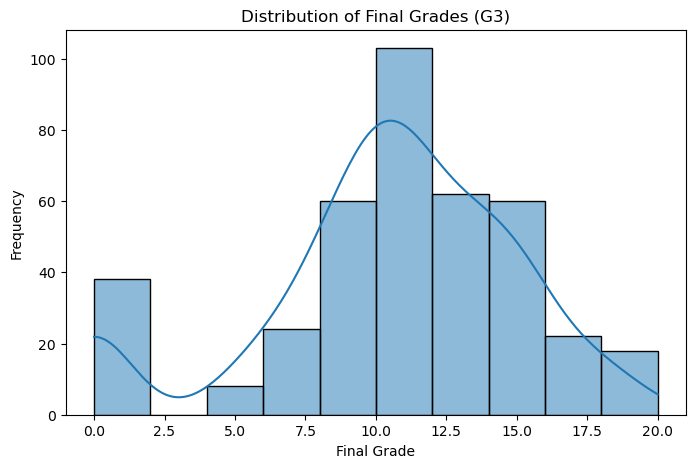

In [29]:
#importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#plotting a histogram of final grades
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['G3'], bins=10, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()


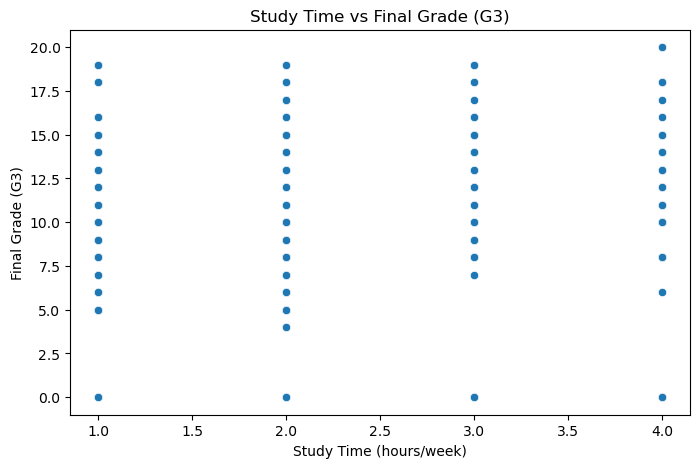

In [31]:
#plotting a scatter plot between study time and final grade
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='studytime', y='G3')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours/week)')
plt.ylabel('Final Grade (G3)')
plt.show()


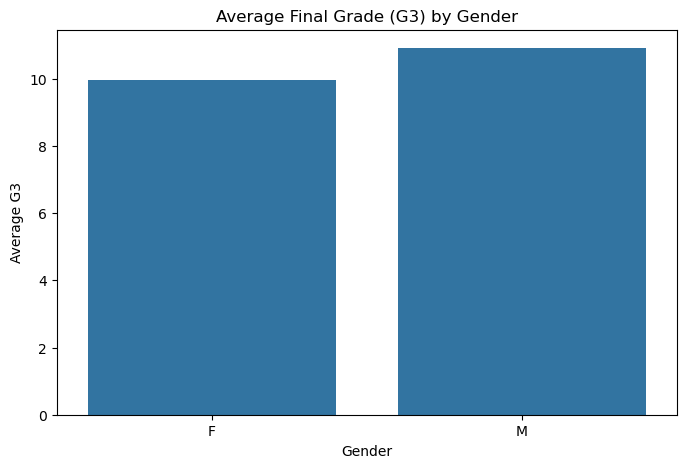

In [33]:
#plotting a barchart between male and female average grades
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_avg.index, y=gender_avg.values)
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average G3')
plt.show()
